In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, roc_auc_score

In [2]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
np.unique(df['survived'], return_counts=True)

(array([0, 1]), array([549, 342]))

In [5]:
np.unique(df['sex'], return_counts=True)

(array(['female', 'male'], dtype=object), array([314, 577]))

In [6]:
np.unique(df['class'], return_counts=True)

(array(['First', 'Second', 'Third'], dtype=object), array([216, 184, 491]))

In [7]:
gender = pd.get_dummies(df['sex'])
gender

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [9]:
gender[['female', 'male']] = gender[['female', 'male']].astype(int)
gender

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [10]:
clas = pd.get_dummies(df['class'])
clas

,First,Second,Third
0,False,False,True
1,True,False,False
2,False,False,True
3,True,False,False
4,False,False,True
...,...,...,...
886,False,True,False
887,True,False,False
888,False,False,True
889,True,False,False


In [11]:
clas[['First', 'Second', 'Third']] = clas[['First', 'Second', 'Third']].astype(int)
clas

,First,Second,Third
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [12]:
y = df['survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [14]:
X = pd.concat([clas.First, clas.Second, gender.female], axis=1)
X

,First,Second,female
0,0,0,0
1,1,0,1
2,0,0,1
3,1,0,1
4,0,0,0
...,...,...,...
886,0,1,0
887,1,0,1
888,0,0,1
889,1,0,0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,
    random_state=42
)

In [20]:
dt_model = DecisionTreeClassifier()

In [21]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.5555555555555556, 0.875, 'x[2] <= 0.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]'),
 Text(0.3333333333333333, 0.625, 'x[0] <= 0.5\ngini = 0.303\nsamples = 467\nvalue = [380, 87]'),
 Text(0.2222222222222222, 0.375, 'x[1] <= 0.5\ngini = 0.251\nsamples = 374\nvalue = [319, 55]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.243\nsamples = 283\nvalue = [243, 40]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.275\nsamples = 91\nvalue = [76, 15]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.451\nsamples = 93\nvalue = [61, 32]'),
 Text(0.7777777777777778, 0.625, 'x[0] <= 0.5\ngini = 0.386\nsamples = 245\nvalue = [64, 181]'),
 Text(0.6666666666666666, 0.375, 'x[1] <= 0.5\ngini = 0.454\nsamples = 175\nvalue = [61, 114]'),
 Text(0.5555555555555556, 0.125, 'gini = 0.5\nsamples = 115\nvalue = [59.0, 56.0]'),
 Text(0.7777777777777778, 0.125, 'gini = 0.064\nsamples = 60\nvalue = [2, 58]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.082\nsamples = 70\nvalue = [3, 67]')]

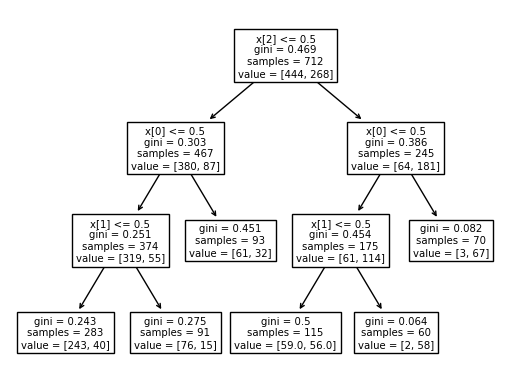

In [22]:
plot_tree(dt_model)

In [29]:
y_hat = dt_model.predict(X_test)
y_hat[0:6]

array([0, 0, 0, 1, 0, 1])

In [27]:
y_test[0:6]

709    1
439    0
840    0
720    1
39     1
290    1
Name: survived, dtype: int64

In [31]:
accuracy_score(y_hat, y_test)

0.7653631284916201

In [32]:
roc_auc_score(y_hat, y_test)

0.8133093525179855